<a href="https://colab.research.google.com/github/Minhvt34/DS-Challenge-T-Cells-Perturbation/blob/main/Exploratory_Analysis_Knockout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
!wget https://saturn-public-data.s3.us-east-2.amazonaws.com/cancer-immunotherapy-challenge/data/sc_training.h5ad

--2023-01-08 18:56:41--  https://saturn-public-data.s3.us-east-2.amazonaws.com/cancer-immunotherapy-challenge/data/sc_training.h5ad
Resolving saturn-public-data.s3.us-east-2.amazonaws.com (saturn-public-data.s3.us-east-2.amazonaws.com)... 52.219.97.162
Connecting to saturn-public-data.s3.us-east-2.amazonaws.com (saturn-public-data.s3.us-east-2.amazonaws.com)|52.219.97.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291266853 (1.2G) [binary/octet-stream]
Saving to: ‘sc_training.h5ad’

sc_training.h5ad    100%[===================>]   1.20G  15.4MB/s    in 83s     

2023-01-08 18:58:05 (14.8 MB/s) - ‘sc_training.h5ad’ saved [1291266853/1291266853]

--2023-01-08 18:58:05--  https://saturn-public-data.s3.us-east-2.amazonaws.com/cancer-immunotherapy-challenge/code/sc_training_visualization.ipynb
Resolving saturn-public-data.s3.us-east-2.amazonaws.com (saturn-public-data.s3.us-east-2.amazonaws.com)... 52.219.105.26
Connecting to saturn-public-data.s3.us-east-2.a

In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.2 MB/s eta 0:00:00


In [ ]:
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.8


In [ ]:
adata = sc.read_h5ad('./sc_training.h5ad')
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [ ]:
adata.obs

,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


In [ ]:
unperturbed_average_expression = np.array(adata.X[adata.obs['condition'] == 'Unperturbed'].mean(axis=0))[0]
unperturbed_average_expression_df = pd.DataFrame({'gene_name':list(adata.var.index),
                                                  'expr':unperturbed_average_expression})
unperturbed_average_expression_df

,gene_name,expr
0,Mrpl15,0.349103
1,Lypla1,0.236398
2,Tcea1,0.549849
3,Atp6v1h,0.138682
4,Rb1cc1,0.167305
...,...,...
15072,9130016M20Rik,0.000207
15073,Htr7,0.000065
15074,Col17a1,0.000000
15075,Awat2,0.000000


In [ ]:
df_dict = {
    'gene_knockout':[],
    'expr':[]
}
for i in range(adata.n_obs):
    knockout = adata.obs.iloc[i]['condition']
    if knockout != "Unperturbed":
        df = pd.DataFrame({"gene_name": list(adata.var.index),
                           "expression":adata.X[0].toarray()[0]})
        expr_l = list(df[df['gene_name'] == knockout]['expression'])
        
        if len(expr_l) == 0:
            continue
        df_dict['gene_knockout'].append(knockout)
        df_dict['expr'].append(expr_l[0])
knockout_expr_df = pd.DataFrame(df_dict)
knockout_expr_df

,gene_knockout,expr
0,Tox2,0.000000
1,Tpt1,3.165729
2,Tox2,0.000000
3,Tcf7,0.000000
4,Tox2,0.000000
...,...,...
23406,Tox2,0.000000
23407,Dvl2,0.511520
23408,Zeb2,0.000000
23409,Sox4,0.000000


In [ ]:
df = knockout_expr_df.merge(unperturbed_average_expression_df, left_on='gene_knockout', right_on='gene_name')

In [ ]:
df = df.drop(columns = "gene_name")
df.columns = ['gene_knockout', 'expr_knockout', 'expr_unperturbed']

In [ ]:
df = df.groupby('gene_knockout').mean()
df

,expr_knockout,expr_unperturbed
gene_knockout,,
Arid4b,0.511520,0.200181
Arid5b,0.000000,0.258835
Atf2,0.000000,0.106787
Batf,0.511520,0.304884
Crem,0.000000,0.500783
...,...,...
Tox2,0.000000,0.003892
Tpt1,3.165729,3.142535
Yy1,0.511520,0.263768


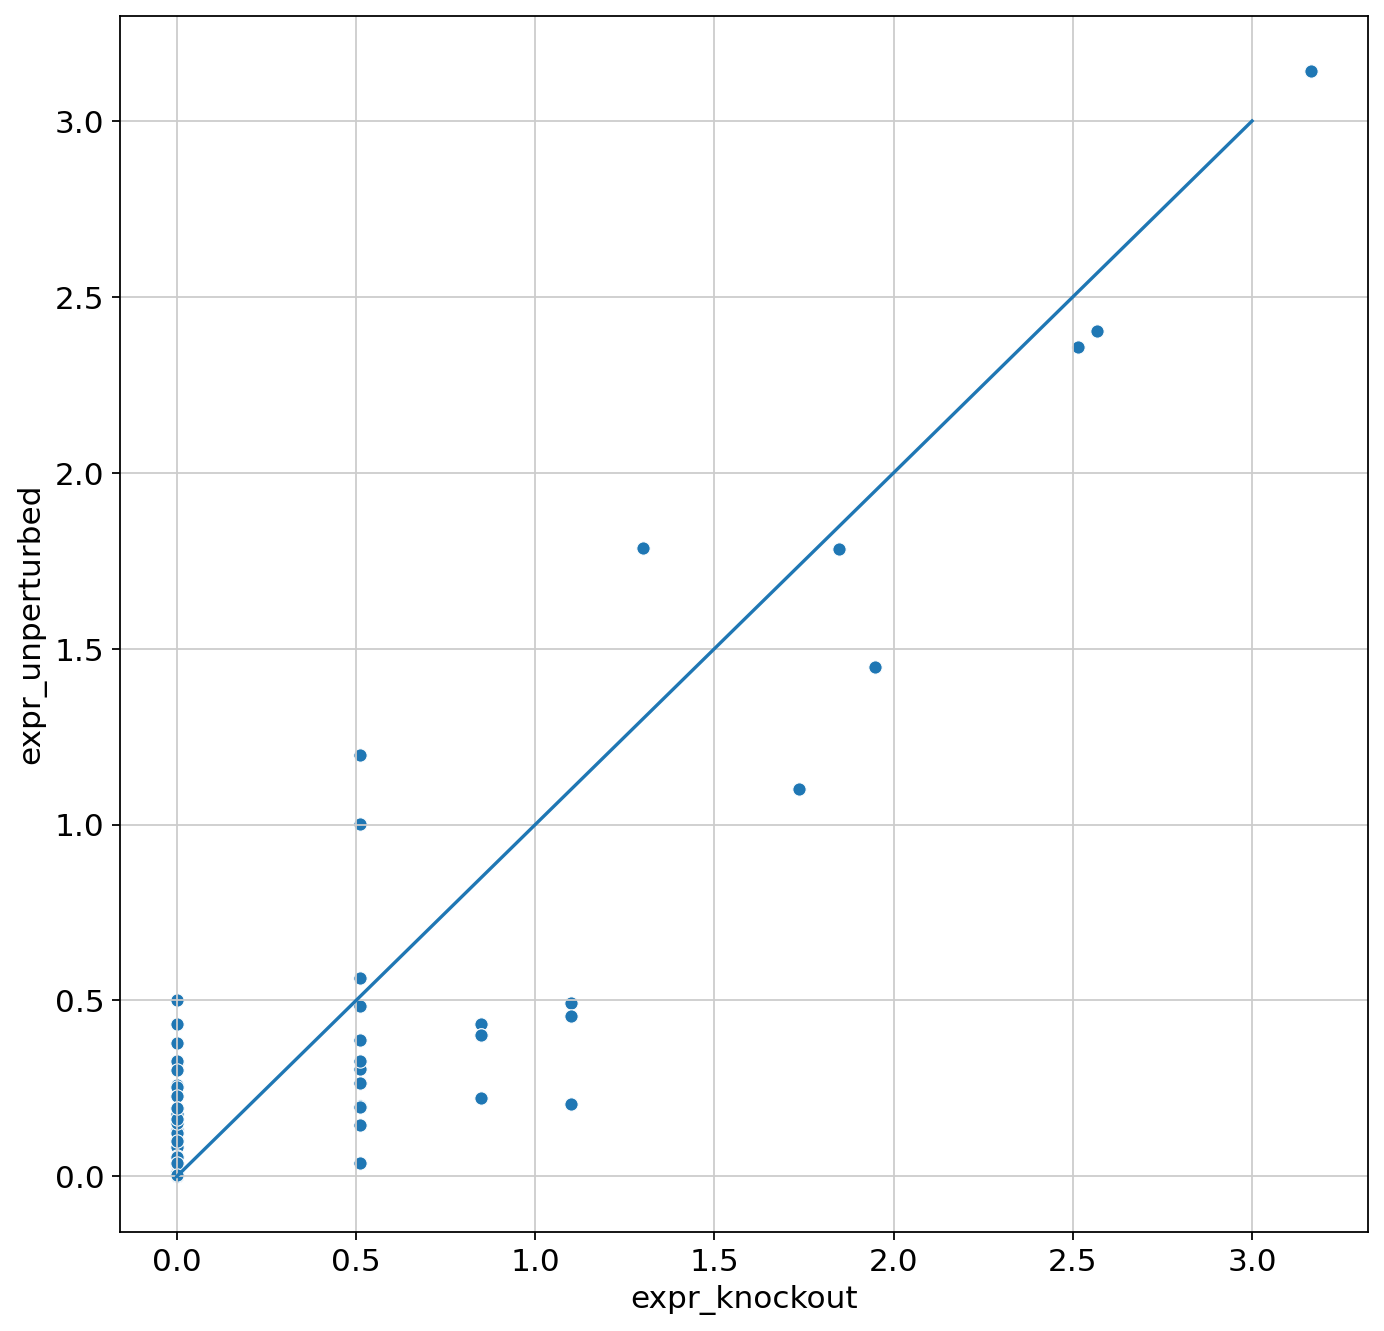

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)

sns.scatterplot(data=df, x='expr_knockout', y='expr_unperturbed')
plt.plot([0,3], [0,3])

In [ ]:
print("Proportion of genes where unperturbed expression is greater than knockout cell gene expression")
(df['expr_knockout'] < df['expr_unperturbed']).sum()/df['expr_knockout'].shape[0]

Proportion of genes where unperturbed expression is greater than knockout cell gene expression


0.625